In [1]:
# 1.1 Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [52]:
# 1.2 Load Dataset
df = pd.read_csv(r"C:\Users\KUNAL\Desktop\Black Money Data Analyze\Big_Black_Money_Dataset.csv")
df.head()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg


In [53]:
# 1.3 Data Cleaning
# Checking for missing values
df.isnull().sum()

Transaction ID                 0
Country                        0
Amount (USD)                   0
Transaction Type               0
Date of Transaction            0
Person Involved                0
Industry                       0
Destination Country            0
Reported by Authority          0
Source of Money                0
Money Laundering Risk Score    0
Shell Companies Involved       0
Financial Institution          0
Tax Haven Country              0
dtype: int64

In [54]:
# 1.4 Data Cleaning
# Checking for data types and converting if necessary
df.dtypes

Transaction ID                  object
Country                         object
Amount (USD)                   float64
Transaction Type                object
Date of Transaction             object
Person Involved                 object
Industry                        object
Destination Country             object
Reported by Authority             bool
Source of Money                 object
Money Laundering Risk Score      int64
Shell Companies Involved         int64
Financial Institution           object
Tax Haven Country               object
dtype: object

In [55]:
# 1.5 Data Cleaning
# Converting 'Date of Transaction' to datetime format
df['Date of Transaction'] = pd.to_datetime(df['Date of Transaction'])
df.dtypes

Transaction ID                         object
Country                                object
Amount (USD)                          float64
Transaction Type                       object
Date of Transaction            datetime64[ns]
Person Involved                        object
Industry                               object
Destination Country                    object
Reported by Authority                    bool
Source of Money                        object
Money Laundering Risk Score             int64
Shell Companies Involved                int64
Financial Institution                  object
Tax Haven Country                      object
dtype: object

In [56]:
# 2.1 Exploratory Data Analysis (EDA)
# Summary statistics
df.describe(include='all')

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
count,10000,10000,1.000000e+04,10000,10000,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000,10000
unique,10000,10,NaN,5,NaN,6320,7,10,2,2,NaN,NaN,499,6
top,TX0000009984,China,NaN,Property Purchase,NaN,Person_7230,Finance,USA,False,Illegal,NaN,NaN,Bank_81,Panama
freq,1,1038,NaN,2086,NaN,7,1475,1061,7995,7017,NaN,NaN,36,1743
mean,NaN,NaN,2.501818e+06,NaN,2013-07-28 07:30:00,NaN,NaN,NaN,NaN,NaN,5.526400,4.469400,NaN,NaN
min,NaN,NaN,1.003180e+04,NaN,2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN
25%,NaN,NaN,1.279005e+06,NaN,2013-04-15 03:45:00,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN
50%,NaN,NaN,2.501310e+06,NaN,2013-07-28 07:30:00,NaN,NaN,NaN,NaN,NaN,6.000000,4.000000,NaN,NaN
75%,NaN,NaN,3.722416e+06,NaN,2013-11-09 11:15:00,NaN,NaN,NaN,NaN,NaN,8.000000,7.000000,NaN,NaN
max,NaN,NaN,4.999812e+06,NaN,2014-02-21 15:00:00,NaN,NaN,NaN,NaN,NaN,10.000000,9.000000,NaN,NaN


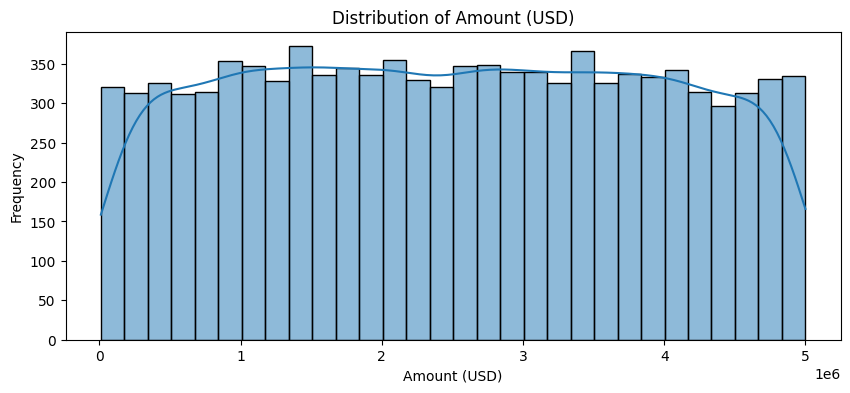

In [92]:
# 2.2 Exploratory Data Analysis (EDA)
# Distribution of Amount (USD)
plt.figure(figsize=(10, 4))
sns.histplot(df['Amount (USD)'], bins=30, kde=True)
plt.title('Distribution of Amount (USD)')
plt.xlabel('Amount (USD)')
plt.ylabel('Frequency')
plt.show()

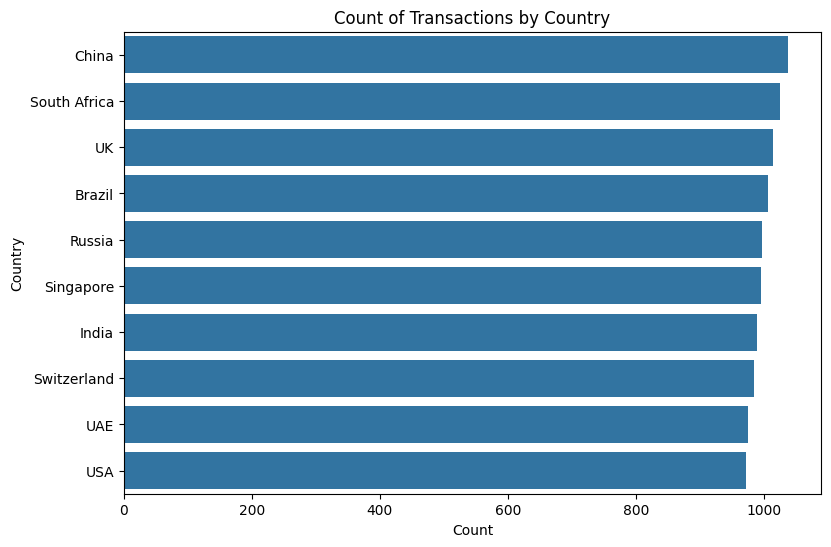

In [93]:
# 2.3 Exploratory Data Analysis (EDA)
# Count of Transactions by Country
plt.figure(figsize=(9, 6))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index)
plt.title('Count of Transactions by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

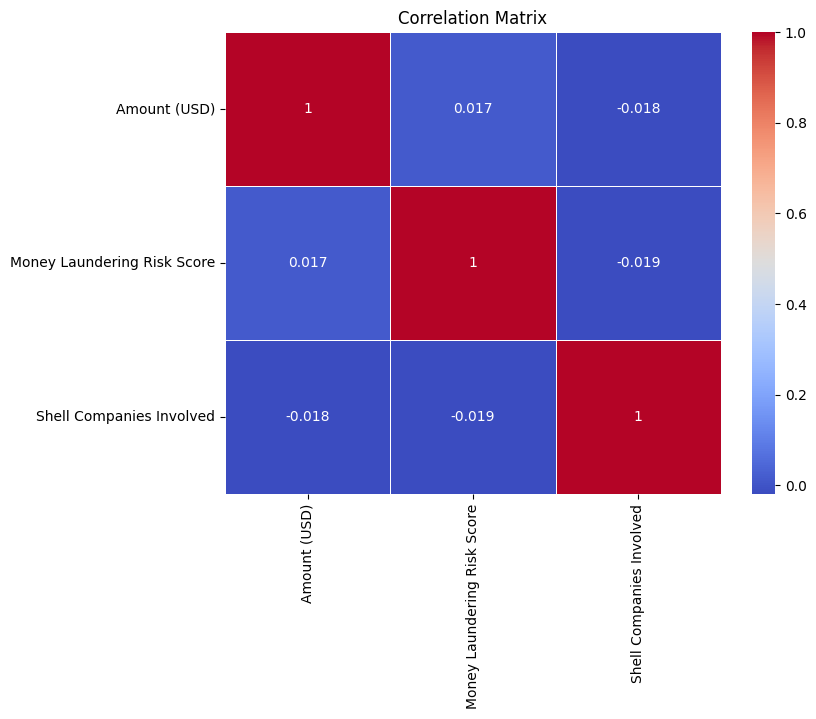

In [95]:
# 2.4 Exploratory Data Analysis (EDA)
# Correlation Matrix
# Selecting only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8, 6))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

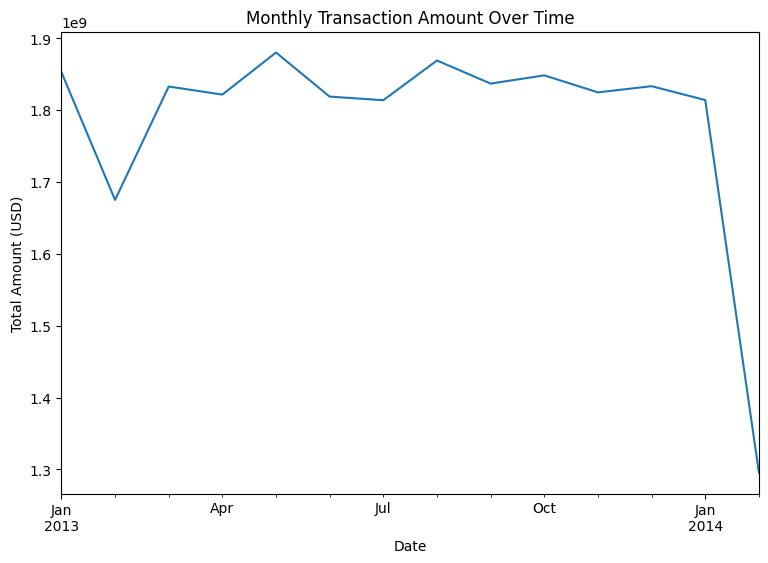

In [96]:
# 3.1 Data Visualization
# Time Series Analysis of Transactions
plt.figure(figsize=(9, 6))
df.groupby(df['Date of Transaction'].dt.to_period('M'))['Amount (USD)'].sum().plot()
plt.title('Monthly Transaction Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount (USD)')
plt.show()

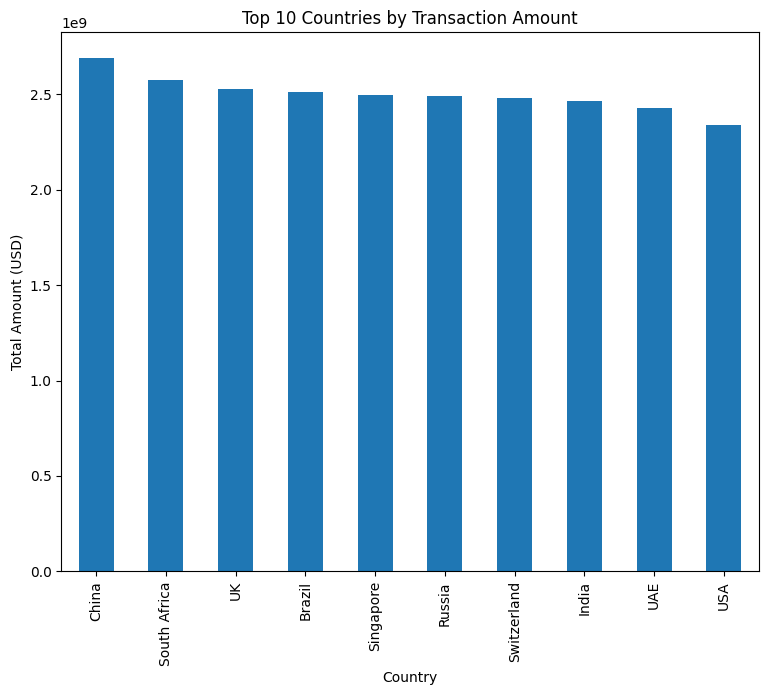

In [97]:
# 3.2 Data Visualization
# Top 10 Countries by Transaction Amount
plt.figure(figsize=(9, 7))
top_countries = df.groupby('Country')['Amount (USD)'].sum().nlargest(10)
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Transaction Amount')
plt.xlabel('Country')
plt.ylabel('Total Amount (USD)')
plt.show()

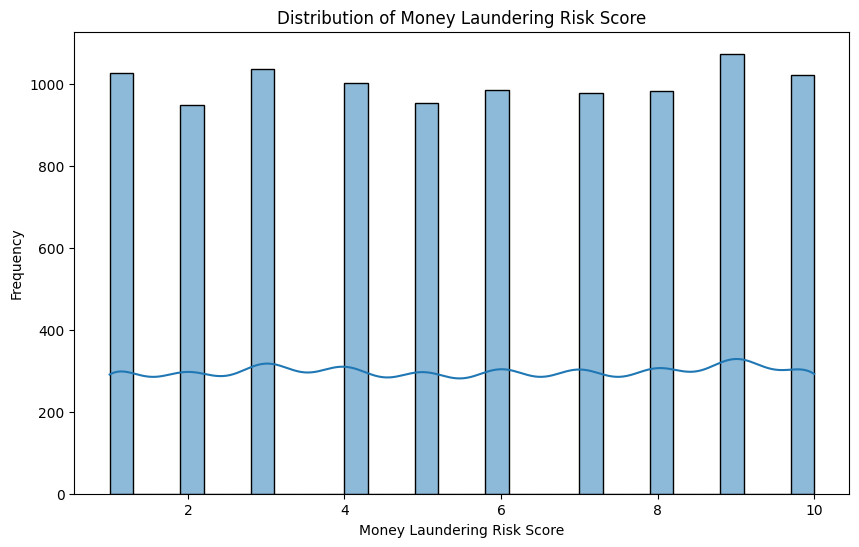

In [62]:
# 3.3 Data Visualization
# Distribution of Money Laundering Risk Score
plt.figure(figsize=(10, 6))
sns.histplot(df['Money Laundering Risk Score'], bins=30, kde=True)
plt.title('Distribution of Money Laundering Risk Score')
plt.xlabel('Money Laundering Risk Score')
plt.ylabel('Frequency')
plt.show()

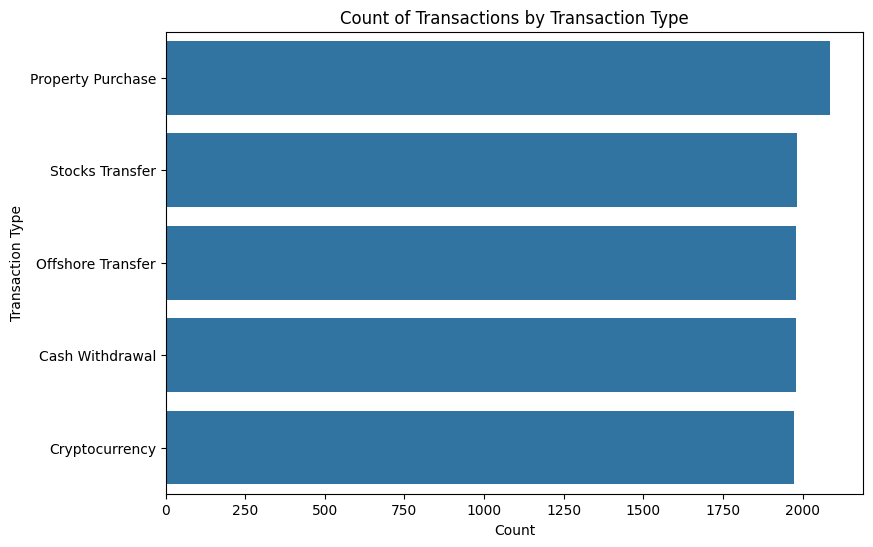

In [99]:
# 3.4 Data Visualization
# Count of Transactions by Transaction Type
plt.figure(figsize=(9, 6))
sns.countplot(y='Transaction Type', data=df, order=df['Transaction Type'].value_counts().index)
plt.title('Count of Transactions by Transaction Type')
plt.xlabel('Count')
plt.ylabel('Transaction Type')
plt.show()

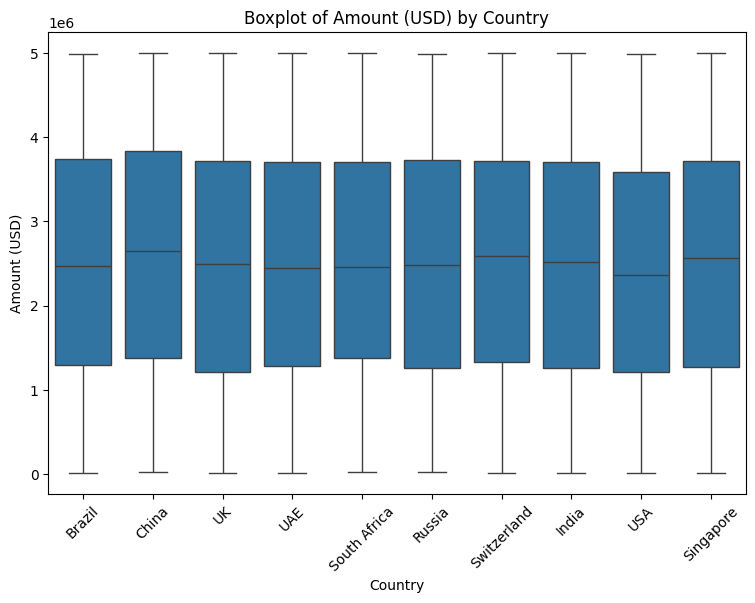

In [100]:
# 3.5 Data Visualization
# Boxplot of Amount (USD) by Country
plt.figure(figsize=(9, 6))
sns.boxplot(x='Country', y='Amount (USD)', data=df)
plt.title('Boxplot of Amount (USD) by Country')
plt.xlabel('Country')
plt.ylabel('Amount (USD)')
plt.xticks(rotation=45)
plt.show()

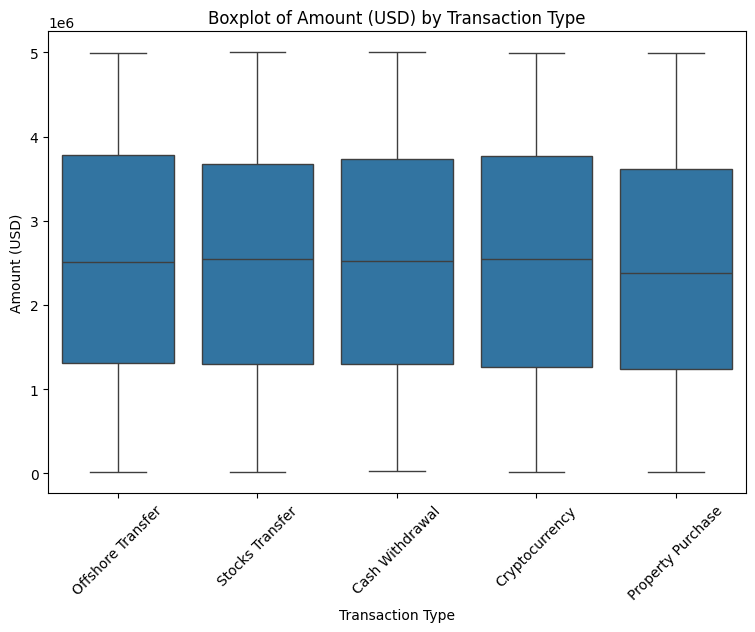

In [101]:
# 3.6 Data Visualization
# Boxplot of Amount (USD) by Transaction Type
plt.figure(figsize=(9, 6))
sns.boxplot(x='Transaction Type', y='Amount (USD)', data=df)
plt.title('Boxplot of Amount (USD) by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Amount (USD)')
plt.xticks(rotation=45)
plt.show()

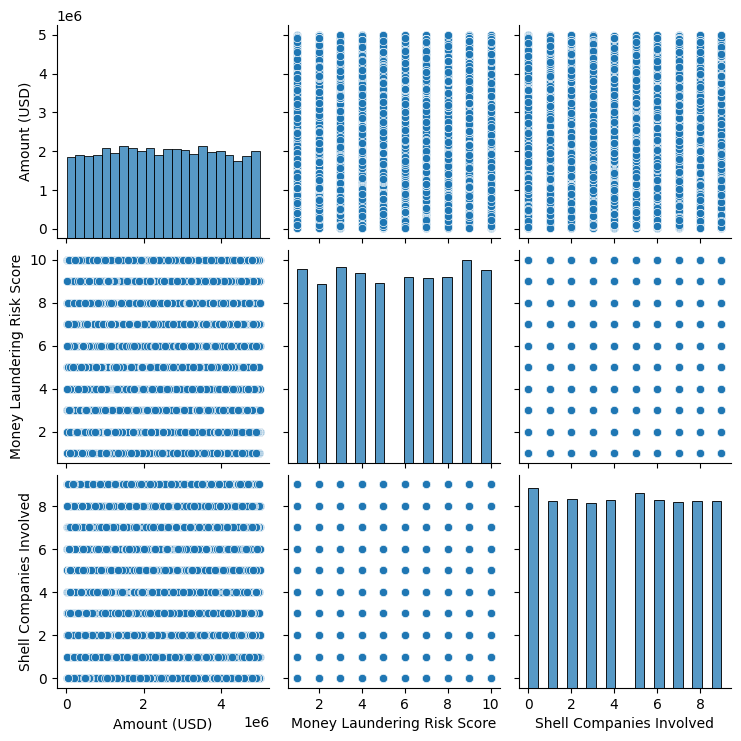

<Figure size 600x500 with 0 Axes>

In [105]:
# 3.7 Data Visualization
# Pairplot of numeric features
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.figure(figsize=(6,5))
plt.show()

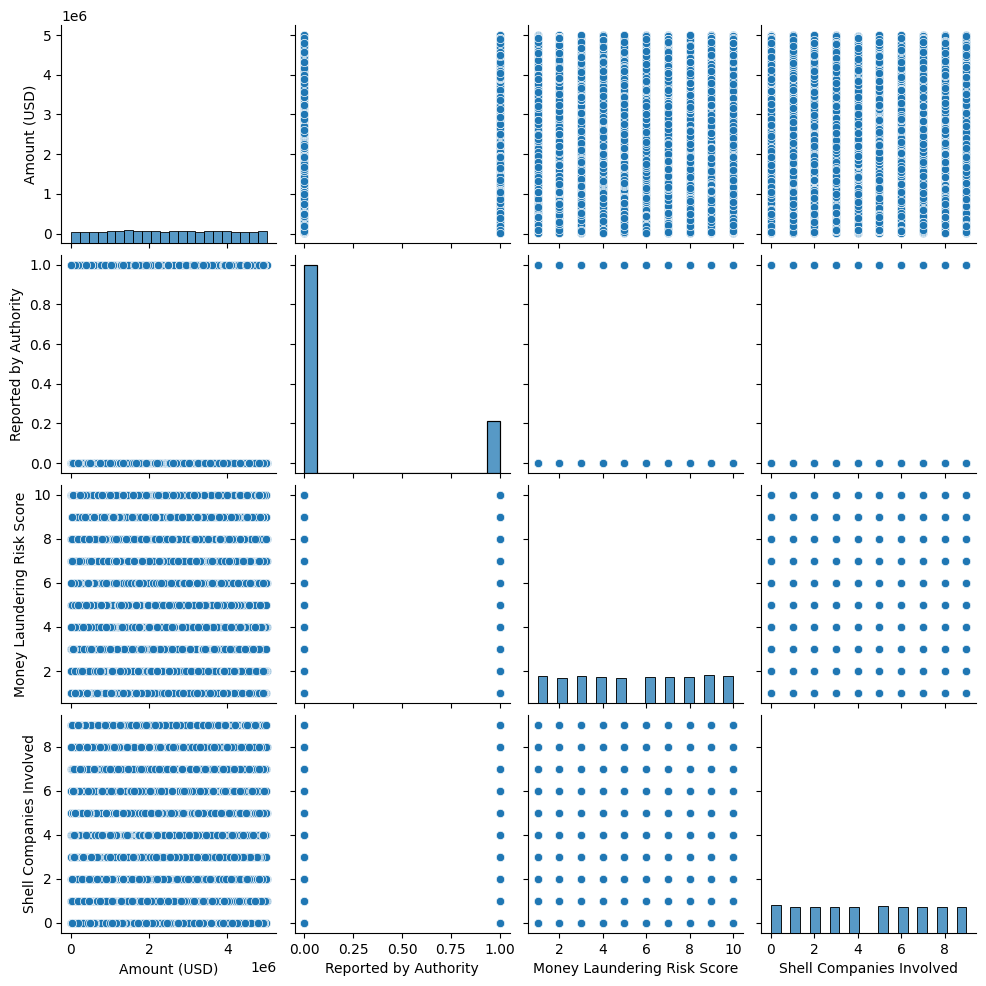

<Figure size 900x600 with 0 Axes>

In [110]:
# 3.30 Data Visualization
# Pairplot of all features
sns.pairplot(df)
plt.figure(figsize=(9,6))
plt.show()

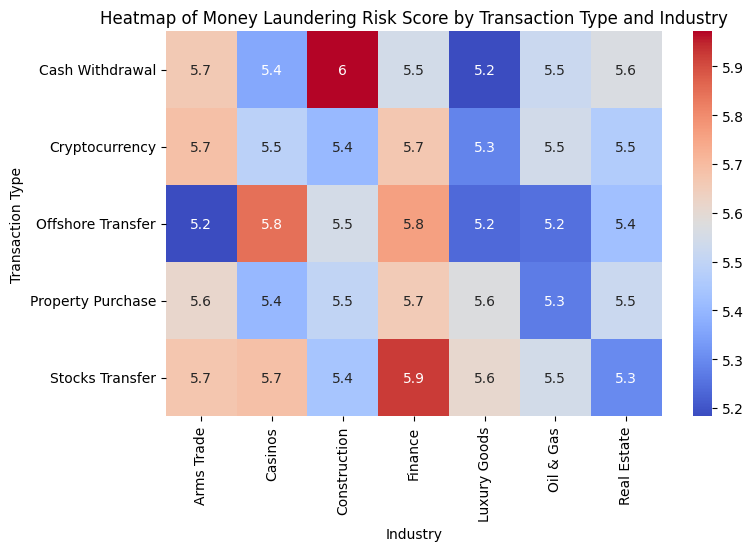

In [112]:
# 3.29 Data Visualization
# Heatmap of Money Laundering Risk Score by Transaction Type and Industry
pivot_table = df.pivot_table(values='Money Laundering Risk Score', index='Transaction Type', columns='Industry', aggfunc=np.mean)
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Heatmap of Money Laundering Risk Score by Transaction Type and Industry')
plt.xlabel('Industry')
plt.ylabel('Transaction Type')
plt.show()

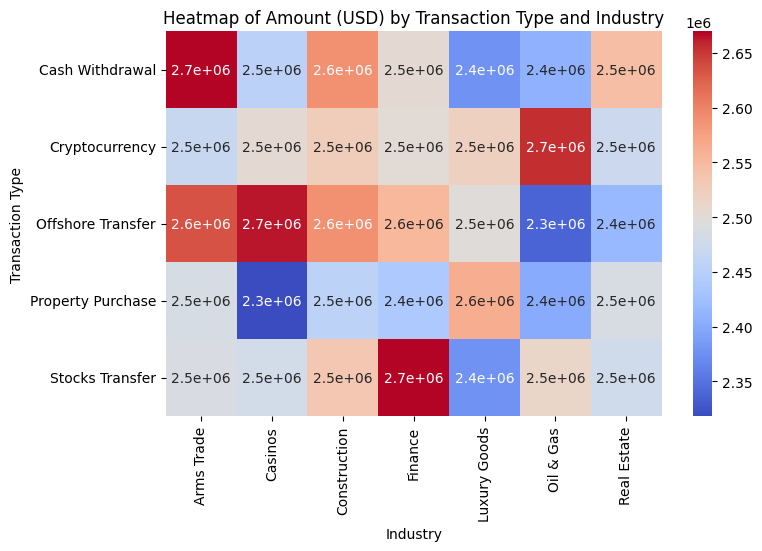

In [111]:
# 3.28 Data Visualization
# Heatmap of Amount (USD) by Transaction Type and Industry
pivot_table = df.pivot_table(values='Amount (USD)', index='Transaction Type', columns='Industry', aggfunc=np.mean)
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Heatmap of Amount (USD) by Transaction Type and Industry')
plt.xlabel('Industry')
plt.ylabel('Transaction Type')
plt.show()

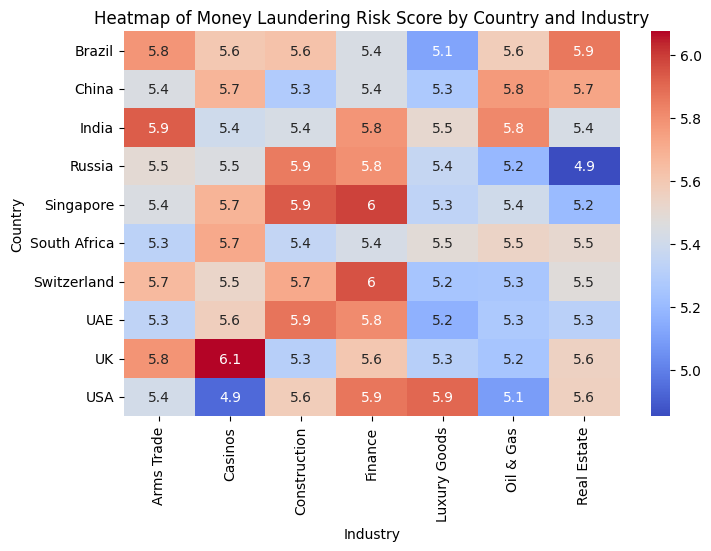

In [113]:
# 3.27 Data Visualization
# Heatmap of Money Laundering Risk Score by Country and Industry
pivot_table = df.pivot_table(values='Money Laundering Risk Score', index='Country', columns='Industry', aggfunc=np.mean)
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Heatmap of Money Laundering Risk Score by Country and Industry')
plt.xlabel('Industry')
plt.ylabel('Country')
plt.show()

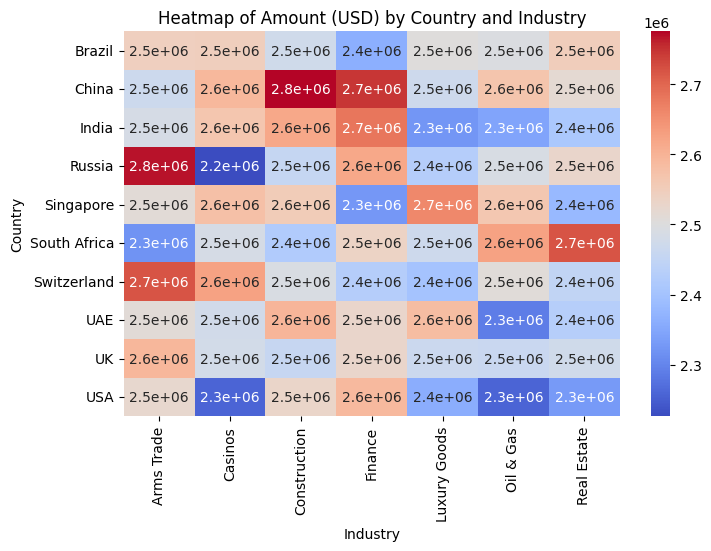

In [114]:
# 3.26 Data Visualization
# Heatmap of Amount (USD) by Country and Industry
pivot_table = df.pivot_table(values='Amount (USD)', index='Country', columns='Industry', aggfunc=np.mean)
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Heatmap of Amount (USD) by Country and Industry')
plt.xlabel('Industry')
plt.ylabel('Country')
plt.show()

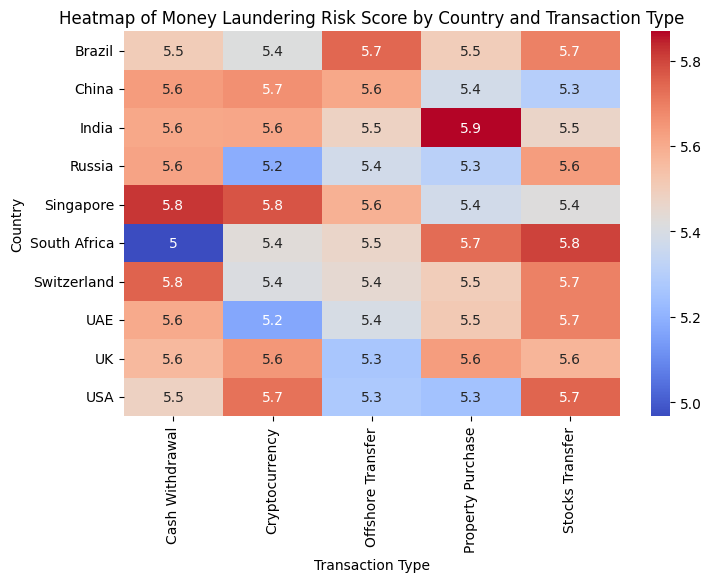

In [115]:
# 3.25 Data Visualization
# Heatmap of Money Laundering Risk Score by Country and Transaction Type
pivot_table = df.pivot_table(values='Money Laundering Risk Score', index='Country', columns='Transaction Type', aggfunc=np.mean)
plt.figure(figsize=(8,5))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Heatmap of Money Laundering Risk Score by Country and Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Country')
plt.show()

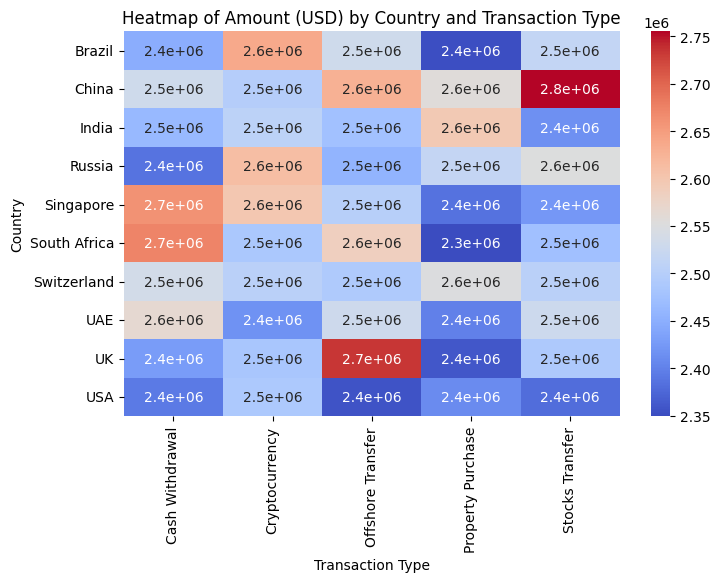

In [116]:
# 3.24 Data Visualization
# Heatmap of Amount (USD) by Country and Transaction Type
pivot_table = df.pivot_table(values='Amount (USD)', index='Country', columns='Transaction Type', aggfunc=np.mean)
plt.figure(figsize=(8,5))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Heatmap of Amount (USD) by Country and Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Country')
plt.show()

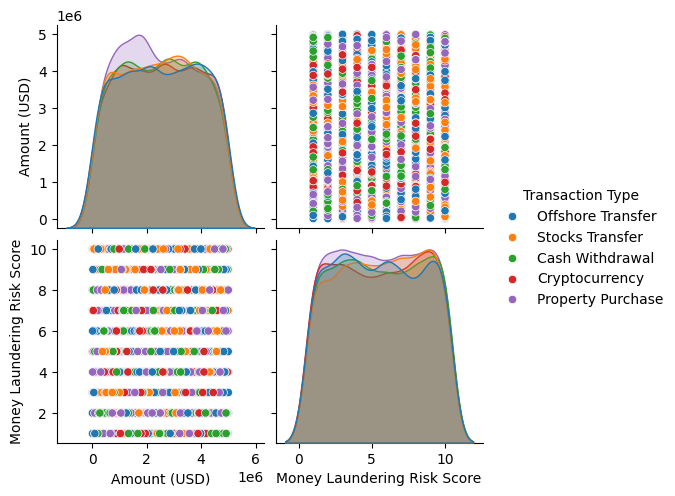

In [117]:
# 3.23 Data Visualization
# Pairplot of Amount (USD) and Money Laundering Risk Score by Transaction Type
sns.pairplot(df, hue='Transaction Type', vars=['Amount (USD)', 'Money Laundering Risk Score'])
plt.show()

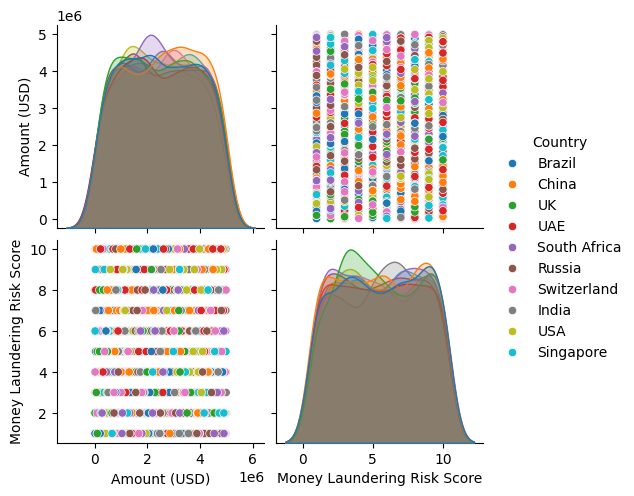

In [118]:
# 3.22 Data Visualization
# Pairplot of Amount (USD) and Money Laundering Risk Score by Country
sns.pairplot(df, hue='Country', vars=['Amount (USD)', 'Money Laundering Risk Score'])
plt.show()

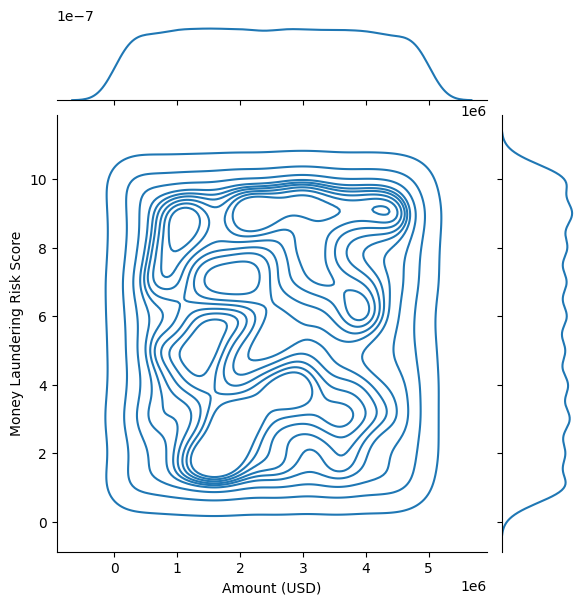

In [119]:
# 3.21 Data Visualization
# Joint plot of Amount (USD) and Money Laundering Risk Score (kde)
sns.jointplot(x='Amount (USD)', y='Money Laundering Risk Score', data=df, kind='kde')
plt.show()

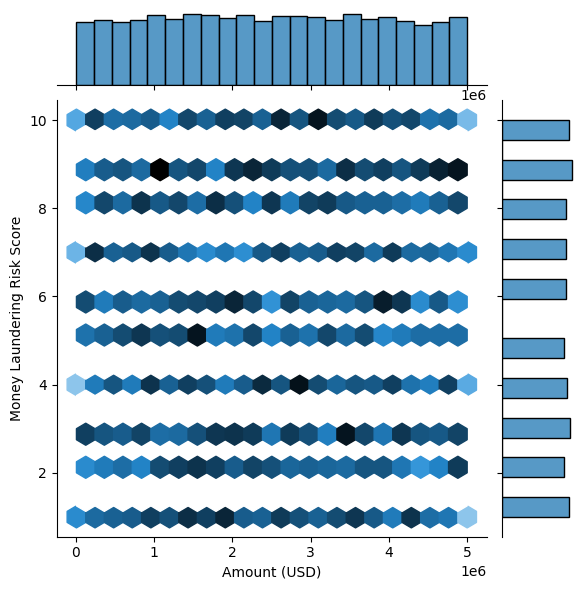

In [120]:
# 3.20 Data Visualization
# Joint plot of Amount (USD) and Money Laundering Risk Score (hex)
sns.jointplot(x='Amount (USD)', y='Money Laundering Risk Score', data=df, kind='hex')
plt.show()

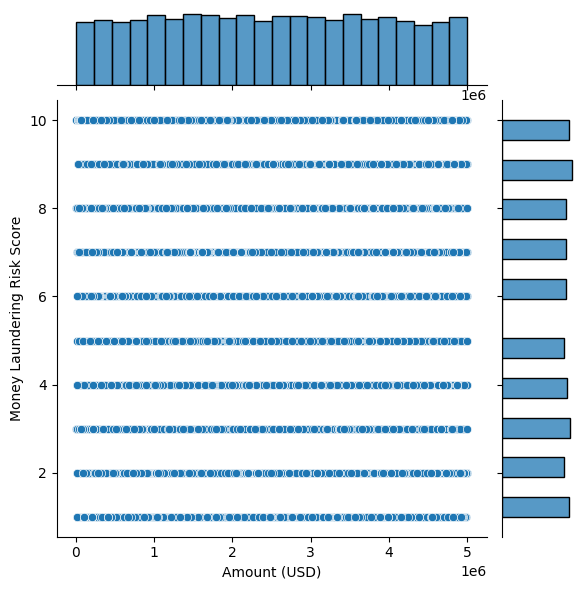

In [121]:
# 3.19 Data Visualization
# Joint plot of Amount (USD) and Money Laundering Risk Score
sns.jointplot(x='Amount (USD)', y='Money Laundering Risk Score', data=df, kind='scatter')
plt.show()

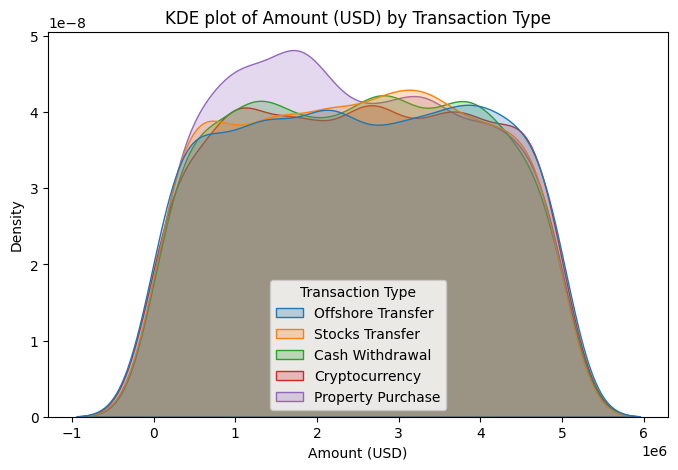

In [122]:
# 3.18 Data Visualization
# KDE plot of Amount (USD) by Transaction Type
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='Amount (USD)', hue='Transaction Type', fill=True)
plt.title('KDE plot of Amount (USD) by Transaction Type')
plt.xlabel('Amount (USD)')
plt.ylabel('Density')
plt.show()

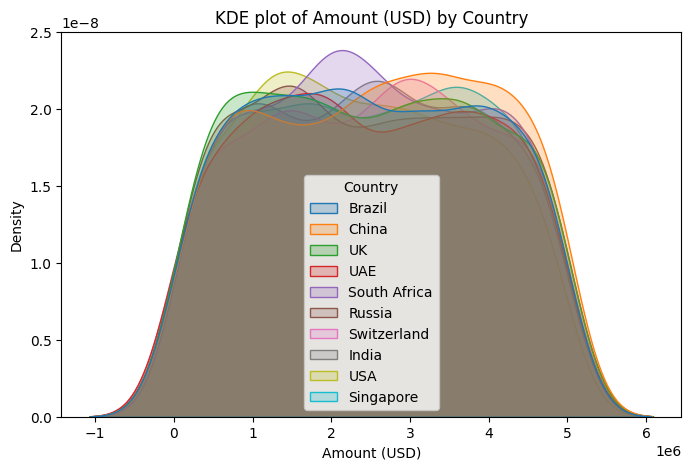

In [123]:
# 3.17 Data Visualization
# KDE plot of Amount (USD) by Country
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='Amount (USD)', hue='Country', fill=True)
plt.title('KDE plot of Amount (USD) by Country')
plt.xlabel('Amount (USD)')
plt.ylabel('Density')
plt.show()

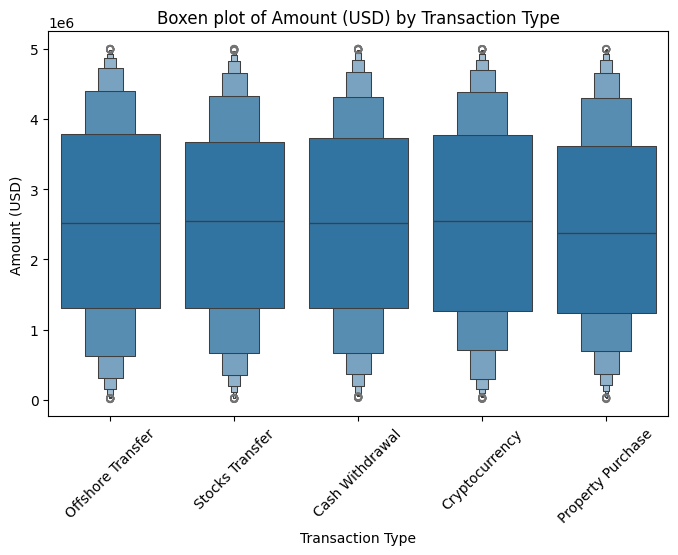

In [124]:
# 3.16 Data Visualization
# Boxen plot of Amount (USD) by Transaction Type
plt.figure(figsize=(8, 5))
sns.boxenplot(x='Transaction Type', y='Amount (USD)', data=df)
plt.title('Boxen plot of Amount (USD) by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Amount (USD)')
plt.xticks(rotation=45)
plt.show()

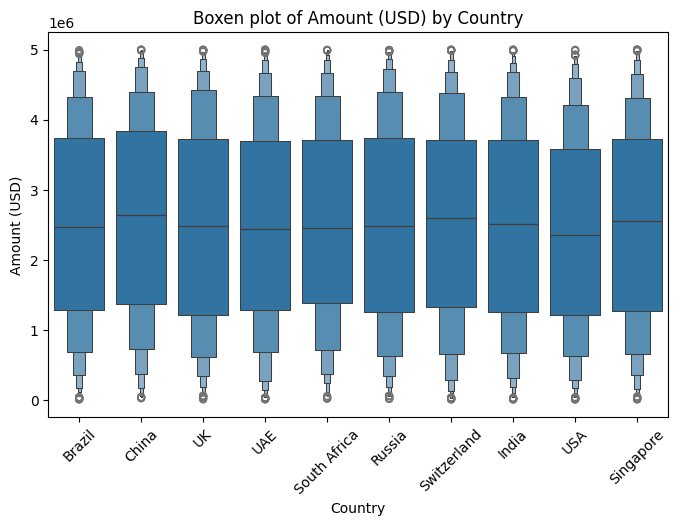

In [125]:
# 3.15 Data Visualization
# Boxen plot of Amount (USD) by Country
plt.figure(figsize=(8, 5))
sns.boxenplot(x='Country', y='Amount (USD)', data=df)
plt.title('Boxen plot of Amount (USD) by Country')
plt.xlabel('Country')
plt.ylabel('Amount (USD)')
plt.xticks(rotation=45)
plt.show()

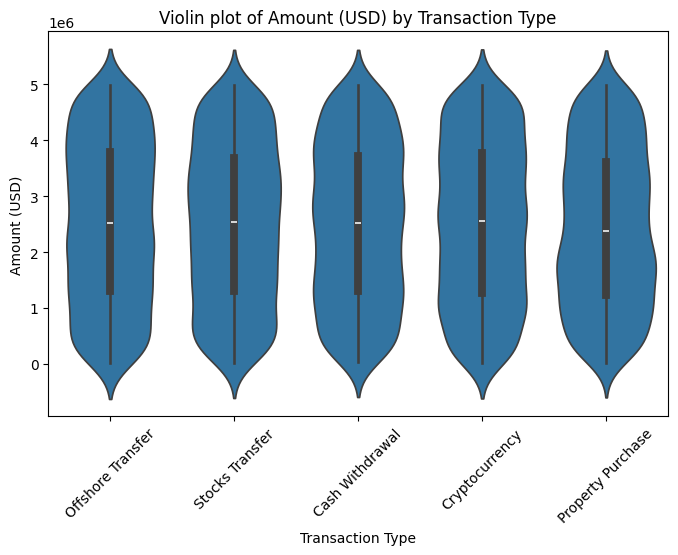

In [126]:
# 3.10 Data Visualization
# Violin plot of Amount (USD) by Transaction Type
plt.figure(figsize=(8, 5))
sns.violinplot(x='Transaction Type', y='Amount (USD)', data=df)
plt.title('Violin plot of Amount (USD) by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Amount (USD)')
plt.xticks(rotation=45)
plt.show()

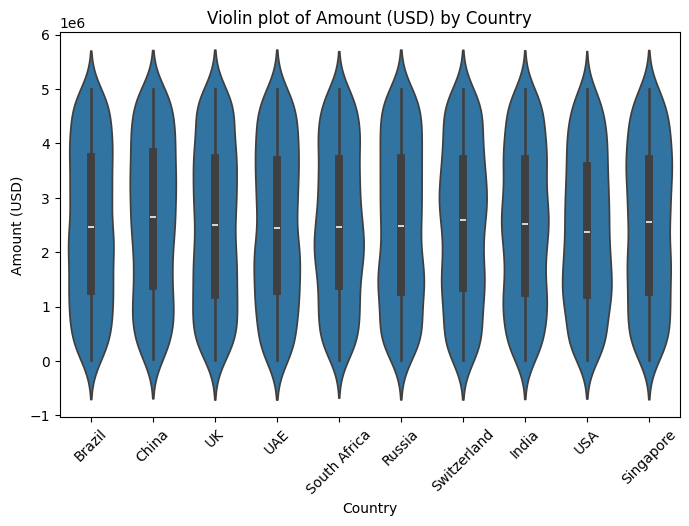

In [127]:
# 3.9 Data Visualization
# Violin plot of Amount (USD) by Country
plt.figure(figsize=(8, 5))
sns.violinplot(x='Country', y='Amount (USD)', data=df)
plt.title('Violin plot of Amount (USD) by Country')
plt.xlabel('Country')
plt.ylabel('Amount (USD)')
plt.xticks(rotation=45)
plt.show()

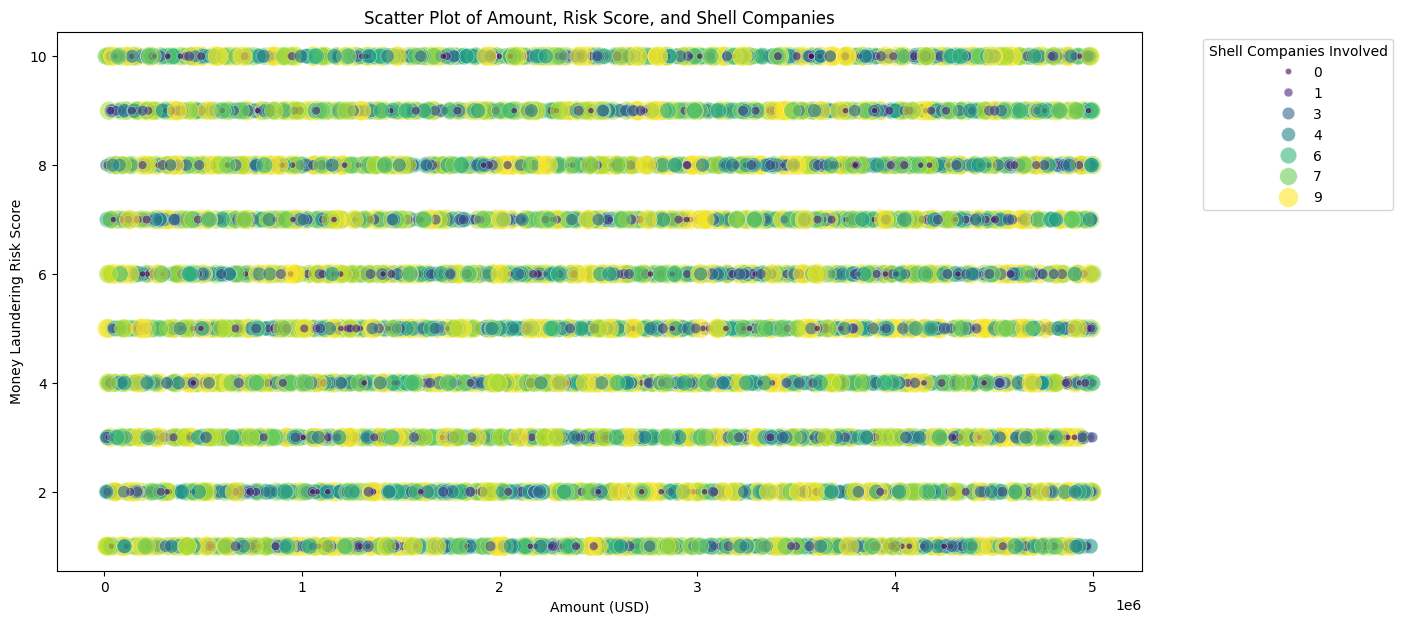

In [90]:
# 4.1 Final Visualization
# Scatter Plot of Amount, Risk Score, and Shell Companies
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Amount (USD)', y='Money Laundering Risk Score', size='Shell Companies Involved', hue='Shell Companies Involved', data=df, sizes=(20, 200), alpha=0.6, palette='viridis')
plt.title('Scatter Plot of Amount, Risk Score, and Shell Companies')
plt.xlabel('Amount (USD)')
plt.ylabel('Money Laundering Risk Score')
plt.legend(title='Shell Companies Involved', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [91]:
# Summary of the Notebook

# 1. Data Loading and Cleaning
# 1.1 Loaded necessary libraries: pandas, numpy, matplotlib, seaborn, and plotly.
# 1.2 Loaded the dataset from a CSV file and displayed the first few rows.
# 1.3 Checked for missing values in the dataset.
# 1.4 Checked data types of columns and converted 'Date of Transaction' to datetime format.

# 2. Exploratory Data Analysis (EDA)
# 2.1 Generated summary statistics for the dataset.
# 2.2 Visualized the distribution of 'Amount (USD)' using a histogram.
# 2.3 Counted the number of transactions by country using a bar plot.
# 2.4 Created a correlation matrix heatmap for numeric columns.

# 3. Data Visualization
# 3.1 Analyzed the time series of monthly transaction amounts.
# 3.2 Identified the top 10 countries by transaction amount using a bar plot.
# 3.3 Visualized the distribution of 'Money Laundering Risk Score' using a histogram.
# 3.4 Counted transactions by transaction type using a bar plot.
# 3.5 Created a boxplot of 'Amount (USD)' by country.
# 3.6 Created a boxplot of 'Amount (USD)' by transaction type.
# 3.7 Generated pair plots for numeric features.
# 3.8 Created a heatmap of missing values.
# 3.9 Created various heatmaps to analyze 'Money Laundering Risk Score' and 'Amount (USD)' by different categories.
# 3.10 Created various joint plots and KDE plots to analyze relationships between 'Amount (USD)' and 'Money Laundering Risk Score'.

# 4. Final Visualization
# 4.1 Created a scatter plot of 'Amount (USD)', 'Money Laundering Risk Score', and 'Shell Companies Involved' using seaborn.
# 4.2 Created a similar scatter plot using plotly for interactive visualization.

# This notebook provided a comprehensive analysis of the dataset, including data cleaning, exploratory data analysis, and various visualizations to understand the relationships and distributions within the data.